In [514]:
import requests
import re
from bs4 import BeautifulSoup, Comment


import numpy as np
import pandas as pd
import time

from pymongo import MongoClient
from pprint import pprint


import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

# Read in Mongo DB


In [59]:
client = MongoClient()
database = client['NBA_tables']
collection = database['seasons']


In [545]:
res = collection.find({})
ret = list(res)
trial = ret[0]
trial

{'_id': ObjectId('5c644627d0ded788b0b8e3d2'),
 'misc_tables': '<div class="table_wrapper setup_commented commented" id="all_misc_stats">\n<div class="section_heading">\n<span class="section_anchor" data-label="Miscellaneous Stats" id="misc_stats_link"></span><h2>Miscellaneous Stats</h2> <div class="section_heading_text">\n<ul>\n</ul>\n</div>\n</div>\n<div class="placeholder"></div>\n<!--\n   <div class="table_outer_container">\n      <div class="overthrow table_container" id="div_misc_stats">\n  <table class="sortable stats_table" id="misc_stats" data-cols-to-freeze=2><caption>Miscellaneous Stats Table</caption>\n   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>\n   <thead>\n      \n      <tr class="over_header">\n         <th aria-label="" data-stat="" colspan="17" class=" over_header center" ></th>\n         <th aria-label="" data-stat="header_team" colspan="4" class="bo

# Beautiful Soup Each Table and Assign to Variable

In [550]:
def souper(ret):
    soup_dict = {}
    for i in trial:
        for key in i.keys():
            season_misc = BeautifulSoup(str(ret[i].get('misc_tables')), 'lxml')
            season_team = BeautifulSoup(str(ret[i].get('team_stats_table')), 'lxml')
            season_shoot = BeautifulSoup(str(ret[i].get('shooting_table')), 'lxml')
            season_year = BeautifulSoup(str(ret[i].get('season')), 'lxml')
            soup_dict.update({season_year:[season_misc, season_team, season_shoot]})
    return soup_dict

In [108]:
season_01_misc = BeautifulSoup(str(ret[0].get('misc_tables')), 'lxml') 
season_01_team = BeautifulSoup(str(ret[0].get('team_stats_table')), 'lxml')  
season_01_shoot = BeautifulSoup(str(ret[0].get('shooting_table')), 'lxml') 

season_02_misc = BeautifulSoup(str(ret[1].get('misc_tables')), 'lxml') 
season_02_team = BeautifulSoup(str(ret[1].get('team_stats_table')), 'lxml')  
season_02_shoot = BeautifulSoup(str(ret[1].get('shooting_table')), 'lxml') 

season_03_misc = BeautifulSoup(str(ret[2].get('misc_tables')), 'lxml') 
season_03_team = BeautifulSoup(str(ret[2].get('team_stats_table')), 'lxml')  
season_03_shoot = BeautifulSoup(str(ret[2].get('shooting_table')), 'lxml') 

season_04_misc = BeautifulSoup(str(ret[3].get('misc_tables')), 'lxml') 
season_04_team = BeautifulSoup(str(ret[3].get('team_stats_table')), 'lxml')  
season_04_shoot = BeautifulSoup(str(ret[3].get('shooting_table')), 'lxml') 

season_05_misc = BeautifulSoup(str(ret[4].get('misc_tables')), 'lxml') 
season_05_team = BeautifulSoup(str(ret[4].get('team_stats_table')), 'lxml')  
season_05_shoot = BeautifulSoup(str(ret[4].get('shooting_table')), 'lxml') 

season_06_misc = BeautifulSoup(str(ret[5].get('misc_tables')), 'lxml') 
season_06_team = BeautifulSoup(str(ret[5].get('team_stats_table')), 'lxml')  
season_06_shoot = BeautifulSoup(str(ret[5].get('shooting_table')), 'lxml') 

season_07_misc = BeautifulSoup(str(ret[6].get('misc_tables')), 'lxml') 
season_07_team = BeautifulSoup(str(ret[6].get('team_stats_table')), 'lxml')  
season_07_shoot = BeautifulSoup(str(ret[6].get('shooting_table')), 'lxml') 

season_08_misc = BeautifulSoup(str(ret[7].get('misc_tables')), 'lxml') 
season_08_team = BeautifulSoup(str(ret[7].get('team_stats_table')), 'lxml')  
season_08_shoot = BeautifulSoup(str(ret[7].get('shooting_table')), 'lxml') 

season_09_misc = BeautifulSoup(str(ret[8].get('misc_tables')), 'lxml') 
season_09_team = BeautifulSoup(str(ret[8].get('team_stats_table')), 'lxml')  
season_09_shoot = BeautifulSoup(str(ret[8].get('shooting_table')), 'lxml') 

season_10_misc = BeautifulSoup(str(ret[9].get('misc_tables')), 'lxml') 
season_10_team = BeautifulSoup(str(ret[9].get('team_stats_table')), 'lxml')  
season_10_shoot = BeautifulSoup(str(ret[9].get('shooting_table')), 'lxml') 

season_11_misc = BeautifulSoup(str(ret[10].get('misc_tables')), 'lxml') 
season_11_team = BeautifulSoup(str(ret[10].get('team_stats_table')), 'lxml')  
season_11_shoot = BeautifulSoup(str(ret[10].get('shooting_table')), 'lxml') 

season_12_misc = BeautifulSoup(str(ret[11].get('misc_tables')), 'lxml') 
season_12_team = BeautifulSoup(str(ret[11].get('team_stats_table')), 'lxml')  
season_12_shoot = BeautifulSoup(str(ret[11].get('shooting_table')), 'lxml') 

season_13_misc = BeautifulSoup(str(ret[12].get('misc_tables')), 'lxml') 
season_13_team = BeautifulSoup(str(ret[12].get('team_stats_table')), 'lxml')  
season_13_shoot = BeautifulSoup(str(ret[12].get('shooting_table')), 'lxml') 

season_14_misc = BeautifulSoup(str(ret[13].get('misc_tables')), 'lxml') 
season_14_team = BeautifulSoup(str(ret[13].get('team_stats_table')), 'lxml')  
season_14_shoot = BeautifulSoup(str(ret[13].get('shooting_table')), 'lxml') 

season_15_misc = BeautifulSoup(str(ret[14].get('misc_tables')), 'lxml') 
season_15_team = BeautifulSoup(str(ret[14].get('team_stats_table')), 'lxml')  
season_15_shoot = BeautifulSoup(str(ret[14].get('shooting_table')), 'lxml') 

season_16_misc = BeautifulSoup(str(ret[15].get('misc_tables')), 'lxml') 
season_16_team = BeautifulSoup(str(ret[15].get('team_stats_table')), 'lxml')  
season_16_shoot = BeautifulSoup(str(ret[15].get('shooting_table')), 'lxml') 

season_17_misc = BeautifulSoup(str(ret[16].get('misc_tables')), 'lxml') 
season_17_team = BeautifulSoup(str(ret[16].get('team_stats_table')), 'lxml')  
season_17_shoot = BeautifulSoup(str(ret[16].get('shooting_table')), 'lxml') 

season_18_misc = BeautifulSoup(str(ret[17].get('misc_tables')), 'lxml') 
season_18_team = BeautifulSoup(str(ret[17].get('team_stats_table')), 'lxml')  
season_18_shoot = BeautifulSoup(str(ret[17].get('shooting_table')), 'lxml') 

# Convert BeautifulSoup Object to Pandas Dataframes

In [322]:
def df_maker(misc, team, shoot): 
    '''
    This function takes in the three beautiful soup objects for a specified year and then joins them together with
    the selected columns.
    
    
    input: 
    misc: Beautiful Soup object for the Miscellaneous table for the desired year
        Columns selected:'Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%'
        
    team: Beautiful Soup object for the Team Stats table for the desired year
        Columns selected: 'Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS'
        
    shoot: Beautiful Soup object for the Shooting table for the desired year
        Columns selected: 'Team', 'Dist.', '2P' , '0-3', '3-10', '10-16'
    
    output: Merged Pandas DataFrame with all the desired statistics for each team
        Columns after join:'Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%', 'FG%', 'AST', 'TOV', 'PF', 'PTS''Dist.', '2P' , '0-3', '3-10', '10-16' 
        Also sets the row index to the team names and creates column 'Playoffs' where 0= did not make playoffs 
        and 1 = made the playoffs
    
    '''
    #Creates Misc Table for Specified season
    misc_list = []
    for comment in misc.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            misc_list.append(tds)
    wdf_misc_01 = pd.DataFrame(misc_list[2:], columns= misc_list[1])       
    df_misc_01 = wdf_misc_01[['Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%']]


    #Creates Team Stats Table for Specified Season
    team_stats_list = []
    for comment in team.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            team_stats_list.append(tds)
    wdf_team_01 = pd.DataFrame(team_stats_list[1:], columns= team_stats_list[0])       
    df_team_01 = wdf_team_01[['Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS']]

    #Creates Shooting Stats Table for Specified Season
    shoot_stats = []
    for comment in shoot.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            shoot_stats.append(tds)
    wdf_shoot_01 = pd.DataFrame(shoot_stats[3:], columns = shoot_stats[2])
    wwdf_shoot_01 = wdf_shoot_01.iloc[:, 0:11]
    df_shoot_01 = wwdf_shoot_01[['Team', 'Dist.', '2P' , '0-3', '3-10', '10-16']]

    #Merges all three tables together
    team_misc = pd.merge(df_misc_01, df_team_01, on='Team', how='outer')
    #before_created_columns =  
    full =  pd.merge(team_misc, df_shoot_01, on='Team', how='outer')
    
    #Creates the Playoffs Column(Shows which teams made the playoffs that season)
    full['Playoffs'] = (full.Team.map(lambda x: 1 if '*' in str(x) else 0))
    fuller =full.set_index(list(df)[0])
    final = fuller.apply(pd.to_numeric)
    return final
    

#### Run the beautifulsoup objects through function above to create Dataframe for each season

In [458]:
season_2001 = df_maker(season_01_misc, season_01_team, season_01_shoot)
season_2002 = df_maker(season_02_misc, season_02_team, season_02_shoot)
season_2003 = df_maker(season_03_misc, season_03_team, season_03_shoot)
season_2004 = df_maker(season_04_misc, season_04_team, season_04_shoot)
season_2005 = df_maker(season_05_misc, season_05_team, season_05_shoot)
season_2006 = df_maker(season_06_misc, season_06_team, season_06_shoot)
season_2007 = df_maker(season_07_misc, season_07_team, season_07_shoot)
season_2008 = df_maker(season_08_misc, season_08_team, season_08_shoot)
season_2009 = df_maker(season_09_misc, season_09_team, season_09_shoot)
season_2010 = df_maker(season_10_misc, season_10_team, season_10_shoot)
season_2011 = df_maker(season_11_misc, season_11_team, season_11_shoot)
season_2012 = df_maker(season_12_misc, season_12_team, season_12_shoot)
season_2013 = df_maker(season_13_misc, season_13_team, season_13_shoot)
season_2014 = df_maker(season_14_misc, season_14_team, season_14_shoot)
season_2015 = df_maker(season_15_misc, season_15_team, season_15_shoot)
season_2016 = df_maker(season_16_misc, season_16_team, season_16_shoot)
season_2017 = df_maker(season_17_misc, season_17_team, season_17_shoot)
season_2018 = df_maker(season_18_misc, season_18_team, season_18_shoot)

In [505]:
season_2006


,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,Playoffs
Team,,,,,,,,,,,,,,,,,
San Antonio Spurs*,63.0,107.3,99.6,88.5,0.215,0.546,0.472,1717,1126,1714,7837,11.8,0.785,0.295,0.187,0.109,1
Detroit Pistons*,64.0,110.8,103.1,86.8,0.221,0.535,0.455,1971,931,1513,7941,13.2,0.779,0.269,0.086,0.174,1
Dallas Mavericks*,60.0,111.8,105.0,87.8,0.175,0.550,0.462,1473,1112,1834,8130,11.8,0.825,0.287,0.143,0.178,1
Phoenix Suns*,54.0,111.5,105.8,95.8,0.293,0.568,0.479,2179,1088,1683,8886,14.4,0.707,0.254,0.089,0.104,1
Memphis Grizzlies*,49.0,105.9,101.6,86.3,0.258,0.537,0.448,1586,1134,1757,7558,12.0,0.742,0.328,0.145,0.092,1
Miami Heat*,52.0,108.7,104.5,91.6,0.227,0.556,0.478,1692,1186,1871,8191,11.4,0.773,0.340,0.162,0.094,1
Los Angeles Lakers*,45.0,108.4,105.7,90.9,0.240,0.539,0.453,1734,1143,1894,8154,12.8,0.760,0.304,0.121,0.106,1
Cleveland Cavaliers*,50.0,107.8,105.4,89.8,0.228,0.538,0.454,1560,1137,1733,8002,11.9,0.772,0.351,0.121,0.103,1
Los Angeles Clippers*,47.0,105.3,103.6,91.7,0.131,0.540,0.465,1708,1185,1872,7970,11.9,0.869,0.248,0.174,0.206,1


In [335]:
list_season = [season_2001, season_2002, season_2003, season_2004, season_2005, season_2006, season_2007, season_2008, season_2009,season_2010, season_2011, season_2012, season_2013, season_2014, season_2015, season_2016, season_2017, season_2018]

# Create Dataframe with League Averages for every season

In [398]:
test_2002 = pd.DataFrame(season_2002.iloc[-1, 1:-4])
test_2003 = pd.DataFrame(season_2003.iloc[-1, 1:-4])
test_2004 = pd.DataFrame(season_2004.iloc[-1, 1:-4])
test_2005 = pd.DataFrame(season_2005.iloc[-1, 1:-4])
test_2006 = pd.DataFrame(season_2006.iloc[-1, 1:-4])
test_2007 = pd.DataFrame(season_2007.iloc[-1, 1:-4])
test_2008 = pd.DataFrame(season_2008.iloc[-1, 1:-4])
test_2009 = pd.DataFrame(season_2009.iloc[-1, 1:-4])
test_2010 = pd.DataFrame(season_2010.iloc[-1, 1:-4])
test_2011 = pd.DataFrame(season_2011.iloc[-1, 1:-4])
test_2012 = pd.DataFrame(season_2012.iloc[-1, 1:-4])
test_2013 = pd.DataFrame(season_2013.iloc[-1, 1:-4])
test_2014 = pd.DataFrame(season_2014.iloc[-1, 1:-4])
test_2015 = pd.DataFrame(season_2015.iloc[-1, 1:-4])
test_2016 = pd.DataFrame(season_2016.iloc[-1, 1:-4])
test_2017 = pd.DataFrame(season_2017.iloc[-1, 1:-4])
test_2018 = pd.DataFrame(season_2018.iloc[-1, 1:-4])

In [399]:
big_test = pd.merge(test_2001, test_2002, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2003, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2004, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2005, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2006, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2007, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2008, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2009, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2010, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2011, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2012, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2013, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2014, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2015, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2016, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2017, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2018, how='outer', left_index=True, right_index=True)


In [400]:
big_test.columns = ['2001', '2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018']
big_test

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ORtg,103.000,104.500,103.600,102.900,106.100,106.200,106.500,107.500,108.300,107.600,107.300,104.600,105.900,106.700,105.600,106.400,108.800,108.600
DRtg,103.000,104.500,103.600,102.900,106.100,106.200,106.500,107.500,108.300,107.600,107.300,104.600,105.900,106.700,105.600,106.400,108.800,108.600
Pace,91.300,90.700,91.000,90.100,90.900,90.500,91.900,92.400,91.700,92.700,92.100,91.300,92.000,93.900,93.900,95.800,96.400,97.300
3PAr,0.170,0.181,0.182,0.187,0.196,0.202,0.213,0.222,0.224,0.222,0.222,0.226,0.243,0.259,0.268,0.285,0.316,0.337
TS%,0.518,0.520,0.519,0.516,0.529,0.536,0.541,0.540,0.544,0.543,0.541,0.527,0.535,0.541,0.534,0.541,0.552,0.556
FG%,0.443,0.445,0.442,0.439,0.447,0.454,0.458,0.457,0.459,0.461,0.459,0.448,0.453,0.454,0.449,0.452,0.457,0.460
AST,1786.000,1798.000,1763.000,1747.000,1745.000,1690.000,1746.000,1784.000,1720.000,1742.000,1763.000,1384.000,1814.000,1804.000,1807.000,1828.000,1855.000,1905.000
TOV,1234.000,1186.000,1223.000,1228.000,1189.000,1182.000,1241.000,1157.000,1151.000,1166.000,1169.000,962.000,1192.000,1201.000,1177.000,1179.000,1144.000,1170.000
PF,1833.000,1741.000,1784.000,1759.000,1856.000,1866.000,1822.000,1724.000,1726.000,1710.000,1698.000,1291.000,1626.000,1697.000,1658.000,1662.000,1632.000,1628.000
PTS,7774.000,7829.000,7797.000,7659.000,7970.000,7955.000,8097.000,8194.000,8196.000,8237.000,8163.000,6353.000,8041.000,8283.000,8201.000,8419.000,8658.000,8719.000


# Plots

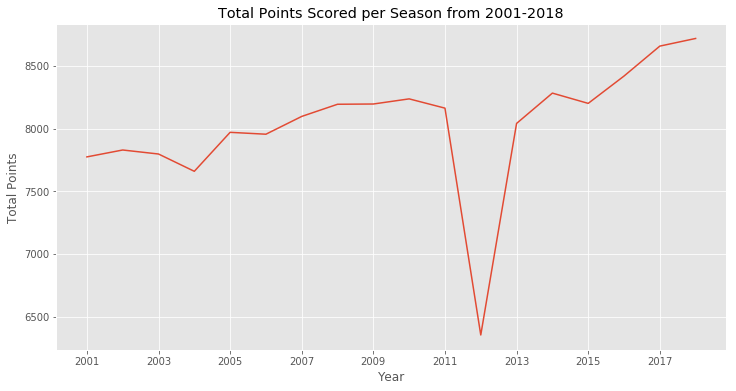

In [524]:
points = np.array(big_test.iloc[[9],:])
points = points.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = points
lines = ax.plot(x,y)
ax.set(title= 'Total Points Scored per Season from 2001-2018',
      ylabel = 'Total Points',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

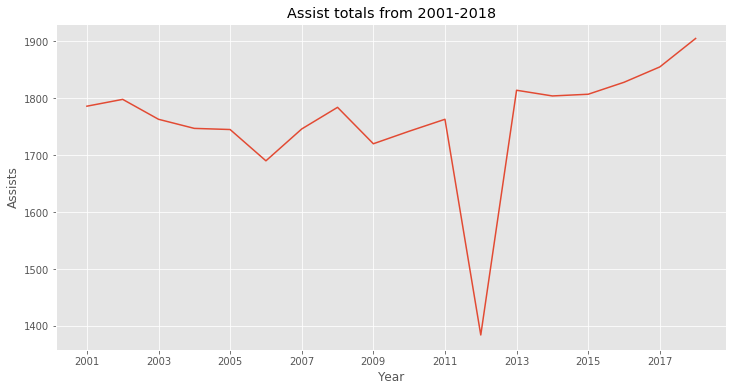

In [523]:
ast = np.array(big_test.iloc[[6],:])
ast = ast.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = ast
lines = ax.plot(x,y)
ax.set(title= 'Assist totals from 2001-2018',
      ylabel = 'Assists',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

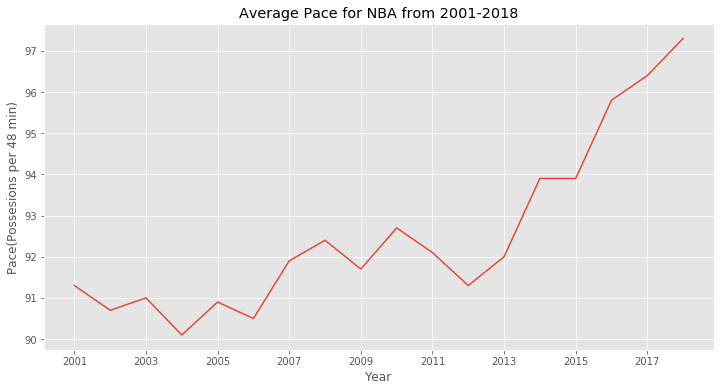

In [516]:
pace = np.array(big_test.iloc[[2],:])
pace = pace.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = pace
lines = ax.plot(x,y)
ax.set(title= 'Average Pace for NBA from 2001-2018',
      ylabel = 'Pace(Possesions per 48 min)',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

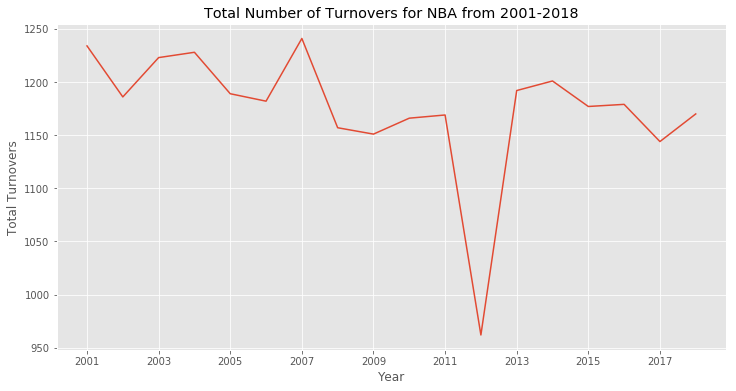

In [525]:
turnovers = np.array(big_test.iloc[[7],:])
turnovers = turnovers.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = turnovers
lines = ax.plot(x,y)
ax.set(title= 'Total Number of Turnovers for NBA from 2001-2018',
      ylabel = 'Total Turnovers',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

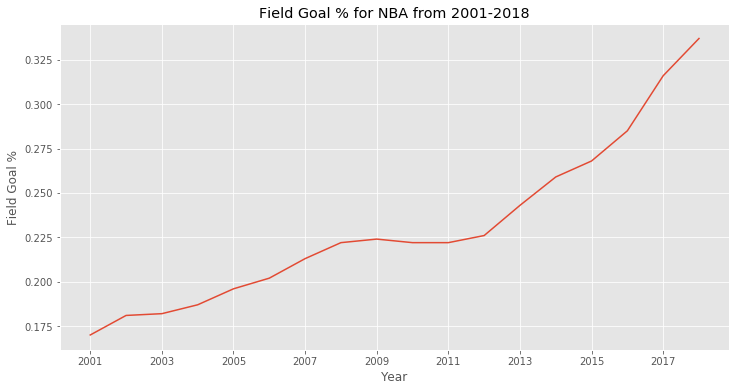

In [526]:
FGP = np.array(big_test.iloc[[4],:])
FGP = FGP.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TSP
lines = ax.plot(x,y)
ax.set(title= 'Field Goal % for NBA from 2001-2018',
      ylabel = 'Field Goal %',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

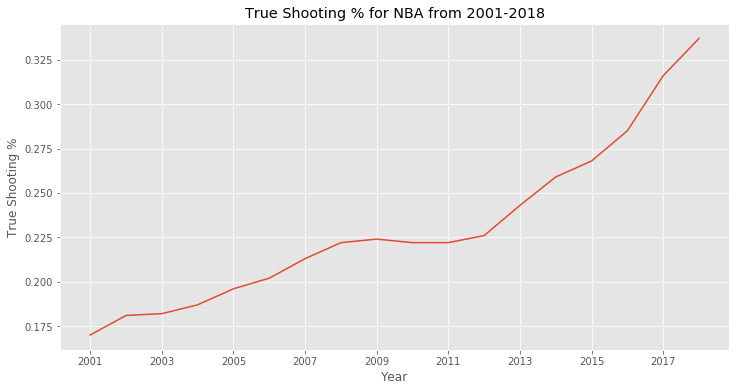

In [529]:
TSP = np.array(big_test.iloc[[3],:])
TSP = TSP.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TSP
lines = ax.plot(x,y)
ax.set(title= 'True Shooting % for NBA from 2001-2018',
      ylabel = 'True Shooting %',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

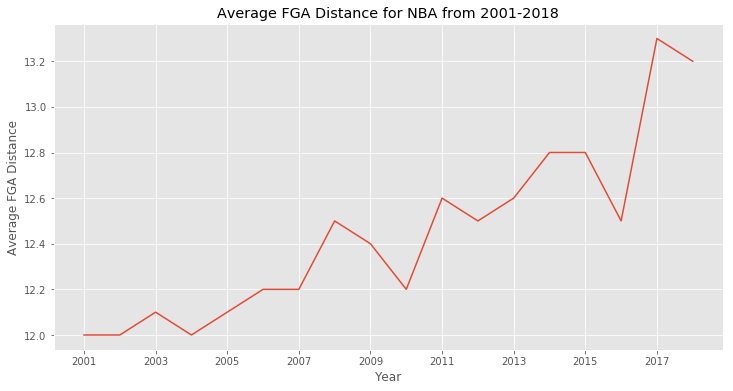

In [531]:
Distance = np.array(big_test.iloc[[10],:])
Distance = Distance.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = Distance
lines = ax.plot(x,y)
ax.set(title= 'Average FGA Distance for NBA from 2001-2018',
      ylabel = 'Average FGA Distance',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

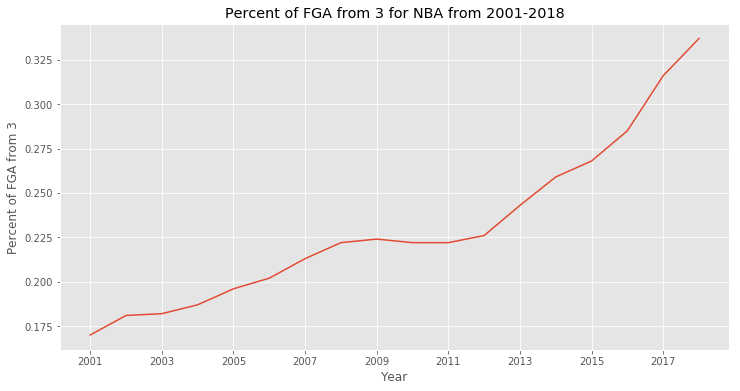

In [522]:
TPAr = np.array(big_test.iloc[[3],:])
TPAr = TPAr.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TPAr
lines = ax.plot(x,y)
ax.set(title= 'Percent of FGA from 3 for NBA from 2001-2018',
      ylabel = 'Percent of FGA from 3',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

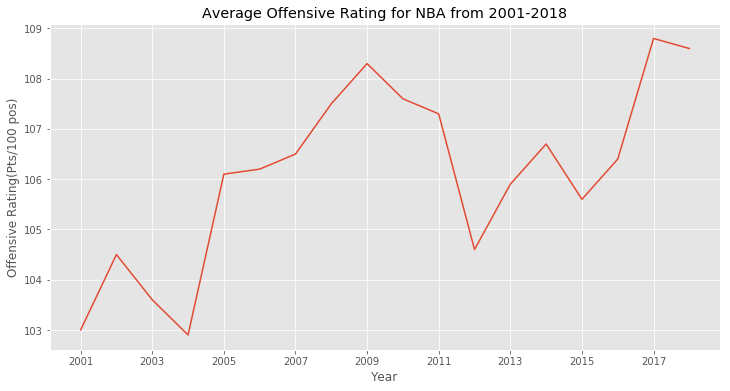

In [517]:
ortg = np.array(big_test.iloc[[0],:])
ortg = ortg.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = ortg
lines = ax.plot(x,y)
ax.set(title= 'Average Offensive Rating for NBA from 2001-2018',
      ylabel = 'Offensive Rating(Pts/100 pos)',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

In [441]:
dist2001 = np.array(season_2001['Dist.'])
dist2018 = np.array(season_2018['Dist.'])

In [442]:
dist2001

array([11.9, 11.8, 10.9, 12.3, 11.9, 11.9, 10.8, 13.2, 12.2, 11.9, 11.9,
       12.5, 13. , 12.8, 12.2, 10.7, 12.6, 12.6, 12.3, 12.2, 11.3, 12.5,
       10.9, 12.9, 11.6, 11.4, 11.3, 11.5, 12. , 12. ])

# Bar chart for these two means

# T-Test for Average FGA distance comparing Early 2000's Sample to Recent Sample

H0: The average distance of a FGA for 2001 = 2018
Ha: The average distance of a FGA for 2001 is not equal to 2018
alpha: .05

I performed a two sample t-test in order to determine if there is a statistical diference between the average FGA distance in 2001 compared to 2018

In [446]:
stats.ttest_ind(dist2001,dist2018, equal_var = False)

Ttest_indResult(statistic=-7.100547142405033, pvalue=1.85962075145101e-09)

### Based on the results of the t-test(pvalue=1.85962075145101e-09) I can reject the null hypothesis with 95% confidence. The average distance of FGA is larger in the modern era of basketball compared to the early 2000's.

# Comparing Pace for Playoff Teams and non-Playoff Teams in Both Eras

In [566]:
playoff_teams_2018 = season_2018[season_2018['Playoffs']==1]
nonplayoff_teams_2018 = season_2018[season_2018['Playoffs']==0]
playoff_teams_2017 = season_2017[season_2017['Playoffs']==1]
nonplayoff_teams_2017 = season_2017[season_2017['Playoffs']==0]

playoff_teams_2001 = season_2001[season_2001['Playoffs']==1]
nonplayoff_teams_2001 = season_2001[season_2001['Playoffs']==0]
playoff_teams_2002 = season_2002[season_2002['Playoffs']==1]
nonplayoff_teams_2002 = season_2002[season_2002['Playoffs']==0]

In [567]:
nonplayoff_teams_2017 = nonplayoff_teams_2017.drop(nonplayoff_teams_2017.index[[-1]])
nonplayoff_teams_2018 = nonplayoff_teams_2018.drop(nonplayoff_teams_2018.index[[-1]])

nonplayoff_teams_2001 = nonplayoff_teams_2001.drop(nonplayoff_teams_2001.index[[-1]])
nonplayoff_teams_2002 = nonplayoff_teams_2002.drop(nonplayoff_teams_2002.index[[-1]])

In [568]:
pt17_18 = pd.merge(playoff_teams_2017,playoff_teams_2018, how='outer')
npt17_18 = pd.merge(nonplayoff_teams_2017,nonplayoff_teams_2018, how='outer')

pt01_02 = pd.merge(playoff_teams_2001,playoff_teams_2002, how='outer')
npt01_02 = pd.merge(nonplayoff_teams_2001,nonplayoff_teams_2002, how='outer')

In [575]:
pp17_18 = np.array(pt17_18['Pace'])
npp17_18 = np.array(npt17_18['Pace'])

pp01_02 = np.array(pt01_02['Pace'])
npp01_02 =np.array(npt01_02['Pace'])

In [576]:
pp01_02.mean()

90.890625

In [577]:
npp01_02.mean()

91.08461538461539

In [579]:
stats.ttest_ind(pp01_02,pp17_18, equal_var = False)


Ttest_indResult(statistic=-11.150577573715237, pvalue=1.8772189496024772e-16)

In [580]:
stats.ttest_ind(npp01_02,npp17_18, equal_var = False)

Ttest_indResult(statistic=-11.276810483744805, pvalue=1.533679803539686e-15)

# Bias and Error

# Future work

# Junk

In [ ]:
misc = []
for comment in season_01_misc.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        misc.append(tds)
wdf_misc_01 = pd.DataFrame(misc[2:], columns= misc[1])       
df_misc_01 = wdf_misc_01[['Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%']]



team_stats = []
for comment in season_01_team.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        team_stats.append(tds)
wdf_team_01 = pd.DataFrame(team_stats[1:], columns= team_stats[0])       
df_team_01 = wdf_team_01[['Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS']]


shoot_stats = []
for comment in season_01_shoot.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        shoot_stats.append(tds)
    
wdf_shoot_01 = pd.DataFrame(shoot_stats[3:], columns = shoot_stats[2])
wwdf_shoot_01 = wdf_shoot_01.iloc[:, 0:11]
df_shoot_01 = wwdf_shoot_01[['Team', 'Dist.', '2P' , '0-3', '3-10', '10-16', '16-3pt']]

team_misc = pd.merge(df_misc_01, df_team_01, on='Team', how='outer')
df_season01 = pd.merge(team_misc, df_shoot_01, on='Team', how='outer')